In [1]:
# importing library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [6]:
import warnings
warnings.simplefilter("ignore")

In [3]:
# path
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [4]:

# importing custom library 
from data_info import DataInfo
from VisualisationPlots import VisualiseDf

In [20]:
# reading file
df_am = pd.read_csv('../data/Amharic News Dataset.csv')

In [21]:
# view info
df_am.head()

,headline,category,date,views,article,link
0,የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል,ስፖርት,"January 14, 2021",2,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...,https://www.press.et/Ama/?p=39481
1,አዲስ ዘመን ድሮ,መዝናኛ,"December 28, 2020",4,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...,https://www.press.et/Ama/?p=38334
2,የአረንጓዴ ጎርፍ በጎ አድራጎት አምባሳደሮች ተሰየሙ,ስፖርት,"January 6, 2021",6,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...,https://www.press.et/Ama/?p=39010
3,የሊጉ በቢዝነስ ሞዴል መመራት አበረታች ጅምር መሆኑ ተገለጸ,ስፖርት,"January 6, 2021",5,ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...,https://www.press.et/Ama/?p=39011
4,የኦሊምፒክ ሥራ አስፈፃሚው እስከ ቶኪዮ ኦሊምፒክ ማግስት ይቀጥላል,ስፖርት,"January 6, 2021",12,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...,https://www.press.et/Ama/?p=39012


In [22]:
# information
df_info = DataInfo(df_am)

In [23]:
# shape of the data source
df_info.shape_df()

Dataframe contains 51483 rows and 6 columns


In [24]:
# null counts
df_info.get_count_null()

headline    13
category     1
date         0
views        0
article      0
link         0
dtype: int64


In [25]:
# really few null values
df_info.null_percentage()

Dataframe contains null values of 0.0% out of the given dataset


In [26]:
#General info
df_info.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51483 entries, 0 to 51482
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51482 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB
None


## Data cleaning
- Null values need to be handled 

In [27]:
# dropping the null values
df_am.dropna(inplace = True)

In [28]:
# null count after droping
df_am.isna().any().sum()

0

## let's see some destibutions 

In [29]:
# columns
df_am.columns

Index(['headline', 'category', 'date', 'views', 'article', 'link'], dtype='object')

In [30]:
# the notebook is cannot reander the amharic text 
# so it should be replaced with english words 
df_am['category'] = df_am['category'].replace(['ሀገር አቀፍ ዜና', 'ስፖርት', 'ፖለቲካ', 'ዓለም አቀፍ ዜና','ቢዝነስ','መዝናኛ'], ['NationWide News', 'Sport', 'Politics', 'Worldwide News','Business','Entertainment'])

### The Datasets are mostly strings
>- Needs to change into more manageble and seuitable for analysis
>- The string length method would be applied
>- So the article and headline are converted in to numeric(these variables are the most interested feature for the project)

In [31]:
# creating new dataframe based on the existed dataframe
df_am_clean=pd.DataFrame()
df_am_clean['article_char_length'] = df_am['article'].str.len()
df_am_clean['article_word_length'] = df_am['article'].str.split().str.len()
df_am_clean['headline_char_length'] = df_am['headline'].str.len()
df_am_clean['headline_word_length'] = df_am['headline'].str.split().str.len()
df_am_clean['category'] = df_am['category']


In [32]:
df_am_clean.head(2)

,article_char_length,article_word_length,headline_char_length,headline_word_length,category
0,1553,298,43,7,Sport
1,2509,475,10,3,Entertainment


In [33]:
# for the new dataframe
df_am_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51470 entries, 0 to 51482
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   article_char_length   51470 non-null  int64 
 1   article_word_length   51470 non-null  int64 
 2   headline_char_length  51470 non-null  int64 
 3   headline_word_length  51470 non-null  int64 
 4   category              51470 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.4+ MB


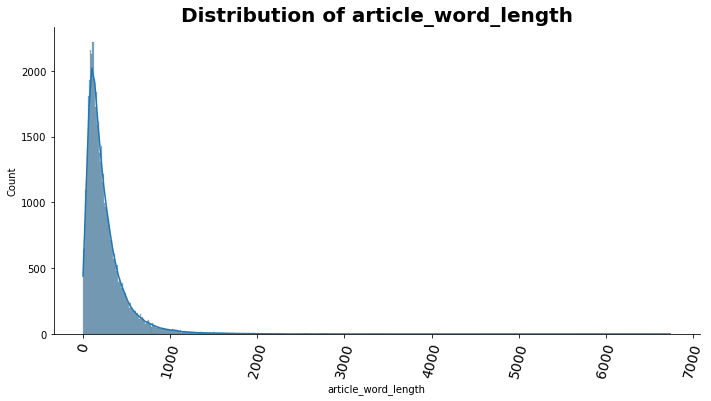

In [34]:
# distiribution of 
color= base_color = sb.color_palette()[0]
VisualiseDf.plot_hist(df_am_clean, 'article_word_length', color)

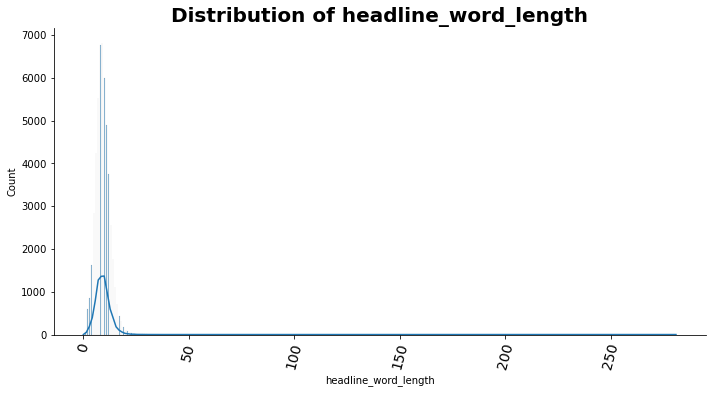

In [35]:
color= base_color = sb.color_palette()[0]
VisualiseDf.plot_hist(df_am_clean, 'headline_word_length', color)

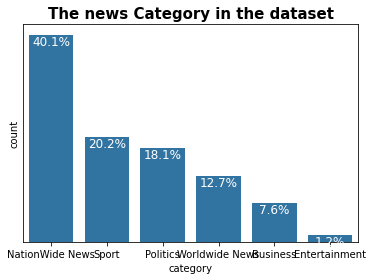

In [36]:
# The distribution of news Category in the dataset
plt.title("The news Category in the dataset", size=15, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_am_clean, df_am_clean['category'])


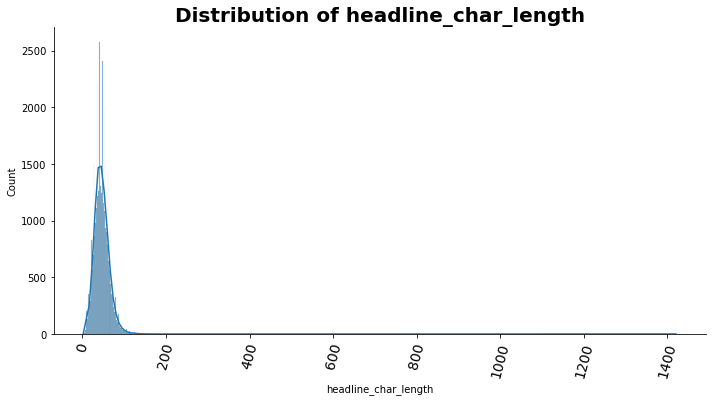

In [37]:
color= base_color = sb.color_palette()[0]
VisualiseDf.plot_hist(df_am_clean, 'headline_char_length', color)

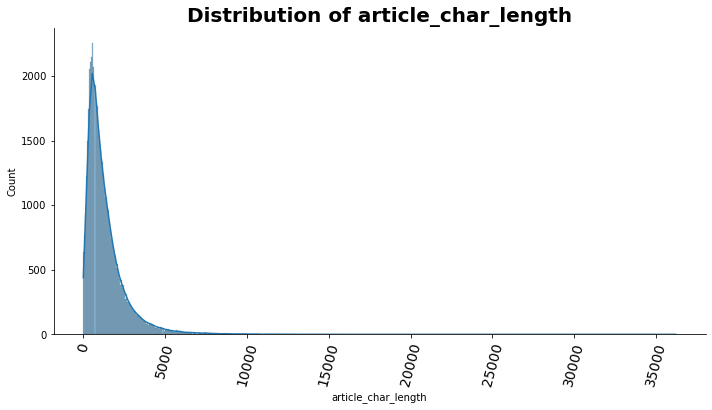

In [38]:
# length of the article letter
color= base_color = sb.color_palette()[0]
VisualiseDf.plot_hist(df_am_clean, 'article_char_length', color)

### Headline analysis on each category news

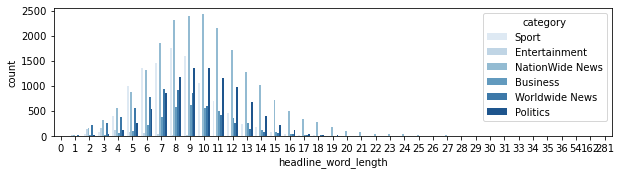

In [39]:
plt.figure(figsize = [10, 8])
plt.subplot(3, 1, 1)
sb.countplot(data = df_am_clean, x = 'headline_word_length', hue = 'category', palette = 'Blues')

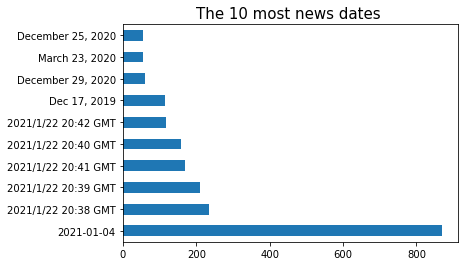

In [40]:

# Distribution of dates in terms of broadcasted news 
plt.title(f'The 10 most news dates ', fontsize=15)
df_am.date.value_counts(ascending = False).head(10).plot(kind ='barh');

